Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [ ]:
parent_dir = '../../data/thread_ring/'

N = 10_000
R = 1_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 08:39:32 2025 +0100) (510.69ms ela...,0.368,0.0355,0.629,2.03,0.20,14.08,51.75 C,Nominal
1,(Fri Mar 28 08:39:32 2025 +0100) (508.13ms ela...,3.590,0.0577,0.825,4.64,0.77,60.92,51.75 C,Nominal
2,(Fri Mar 28 08:39:33 2025 +0100) (505.67ms ela...,6.000,0.0352,0.884,7.06,1.07,93.26,51.39 C,Nominal
3,(Fri Mar 28 08:39:33 2025 +0100) (508.36ms ela...,0.260,0.0321,0.640,1.22,0.17,11.91,51.39 C,Nominal
4,(Fri Mar 28 08:39:34 2025 +0100) (508.56ms ela...,0.239,0.0256,0.410,0.96,0.20,13.45,51.01 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(106, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 08:39:43 2025 +0100) (60.47ms elap...,37.4,0.01510,2.050,39.25,3.96,99.24,49.58 C,Nominal
1,(Fri Mar 28 08:39:43 2025 +0100) (56.73ms elap...,36.4,0.02040,1.660,38.92,4.00,100.04,49.58 C,Nominal
2,(Fri Mar 28 08:39:43 2025 +0100) (57.25ms elap...,37.9,0.05540,1.630,41.36,3.95,98.88,49.58 C,Nominal
3,(Fri Mar 28 08:39:43 2025 +0100) (55.59ms elap...,32.5,0.00659,0.745,34.88,4.00,99.93,49.58 C,Nominal
4,(Fri Mar 28 08:39:43 2025 +0100) (55.31ms elap...,29.6,0.01990,0.650,32.32,3.99,99.79,49.58 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 08:41:40 2025 +0100) (509.76ms ela...,1.0200,0.0000,0.312,1.16,0.22,16.97,46.34 C,Nominal
1,(Fri Mar 28 08:41:41 2025 +0100) (506.73ms ela...,5.5500,0.0425,0.436,6.14,1.09,99.95,46.39 C,Nominal
2,(Fri Mar 28 08:41:41 2025 +0100) (506.37ms ela...,2.5300,0.0000,0.430,2.81,0.42,33.52,46.39 C,Nominal
3,(Fri Mar 28 08:41:42 2025 +0100) (507.69ms ela...,0.0860,0.0000,0.256,0.12,0.04,2.77,46.41 C,Nominal
4,(Fri Mar 28 08:41:42 2025 +0100) (508.13ms ela...,0.0935,0.0000,0.258,0.13,0.05,2.65,46.41 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(121, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 08:41:51 2025 +0100) (57.48ms elap...,24.6,0.0,0.912,25.36,3.05,93.60,45.78 C,Nominal
1,(Fri Mar 28 08:41:51 2025 +0100) (56.01ms elap...,21.2,0.0,0.936,22.06,2.44,98.68,45.78 C,Nominal
2,(Fri Mar 28 08:41:51 2025 +0100) (57.57ms elap...,19.9,0.0,1.150,20.89,2.02,97.95,46.95 C,Nominal
3,(Fri Mar 28 08:41:51 2025 +0100) (56.90ms elap...,17.4,0.0,1.070,18.32,2.03,98.10,46.95 C,Nominal
4,(Fri Mar 28 08:41:51 2025 +0100) (57.01ms elap...,18.9,0.0,1.010,19.80,2.02,97.59,46.95 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 08:39:32,0.368,0.0355,0.629,2.03,0.20,14.08,51.75,Nominal,510.69
1,2025-03-28 08:39:32,3.590,0.0577,0.825,4.64,0.77,60.92,51.75,Nominal,508.13
2,2025-03-28 08:39:33,6.000,0.0352,0.884,7.06,1.07,93.26,51.39,Nominal,505.67
3,2025-03-28 08:39:33,0.260,0.0321,0.640,1.22,0.17,11.91,51.39,Nominal,508.36
4,2025-03-28 08:39:34,0.239,0.0256,0.410,0.96,0.20,13.45,51.01,Nominal,508.56


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(106, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 08:39:43,37.4,0.01510,2.050,39.25,3.96,99.24,49.58,Nominal,60.47
1,2025-03-28 08:39:43,36.4,0.02040,1.660,38.92,4.00,100.04,49.58,Nominal,56.73
2,2025-03-28 08:39:43,37.9,0.05540,1.630,41.36,3.95,98.88,49.58,Nominal,57.25
3,2025-03-28 08:39:43,32.5,0.00659,0.745,34.88,4.00,99.93,49.58,Nominal,55.59
4,2025-03-28 08:39:43,29.6,0.01990,0.650,32.32,3.99,99.79,49.58,Nominal,55.31


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 08:41:40,1.0200,0.0000,0.312,1.16,0.22,16.97,46.34,Nominal,509.76
1,2025-03-28 08:41:41,5.5500,0.0425,0.436,6.14,1.09,99.95,46.39,Nominal,506.73
2,2025-03-28 08:41:41,2.5300,0.0000,0.430,2.81,0.42,33.52,46.39,Nominal,506.37
3,2025-03-28 08:41:42,0.0860,0.0000,0.256,0.12,0.04,2.77,46.41,Nominal,507.69
4,2025-03-28 08:41:42,0.0935,0.0000,0.258,0.13,0.05,2.65,46.41,Nominal,508.13


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(121, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 08:41:51,24.6,0.0,0.912,25.36,3.05,93.60,45.78,Nominal,57.48
1,2025-03-28 08:41:51,21.2,0.0,0.936,22.06,2.44,98.68,45.78,Nominal,56.01
2,2025-03-28 08:41:51,19.9,0.0,1.150,20.89,2.02,97.95,46.95,Nominal,57.57
3,2025-03-28 08:41:51,17.4,0.0,1.070,18.32,2.03,98.10,46.95,Nominal,56.90
4,2025-03-28 08:41:51,18.9,0.0,1.010,19.80,2.02,97.59,46.95,Nominal,57.01


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


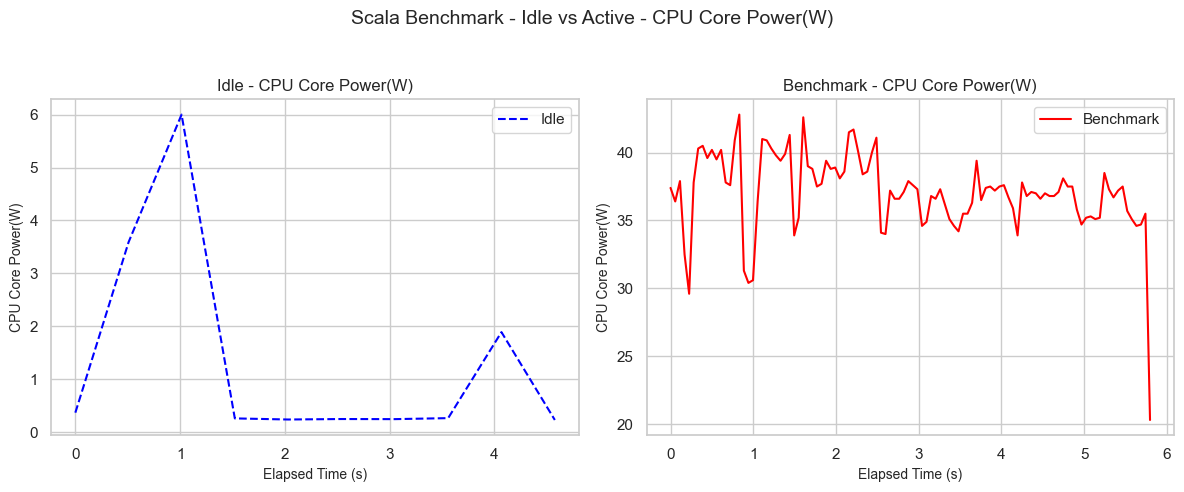

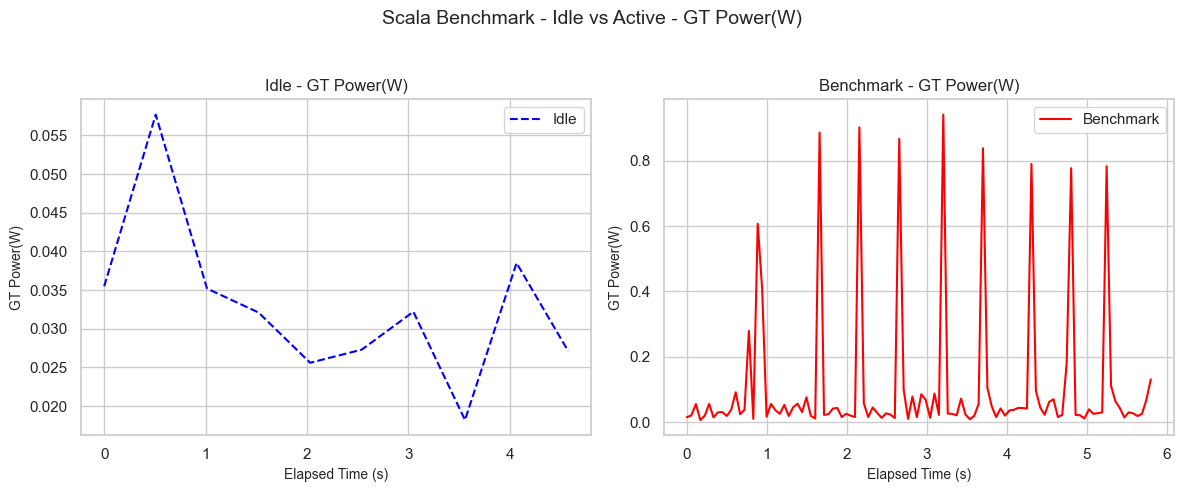

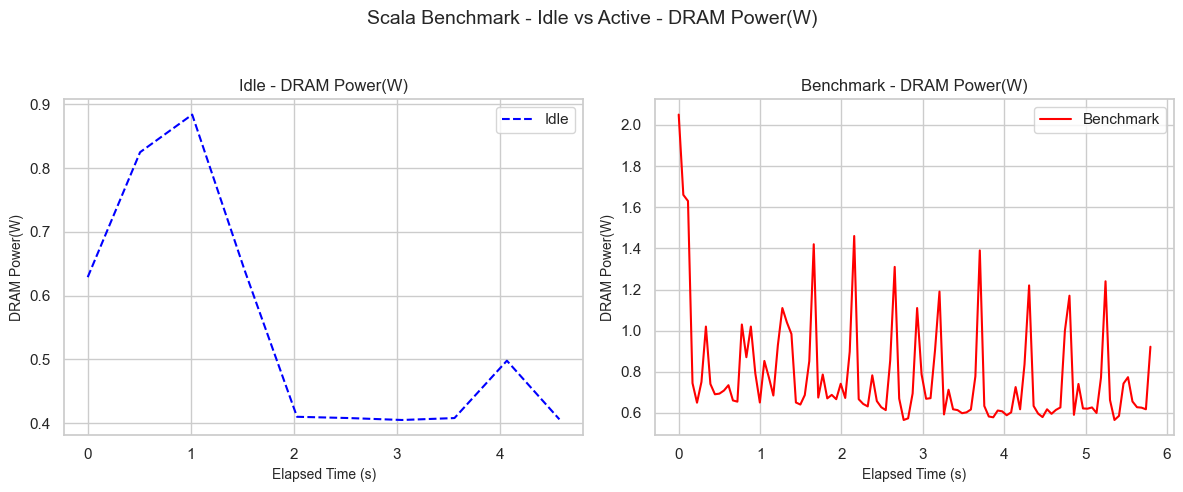

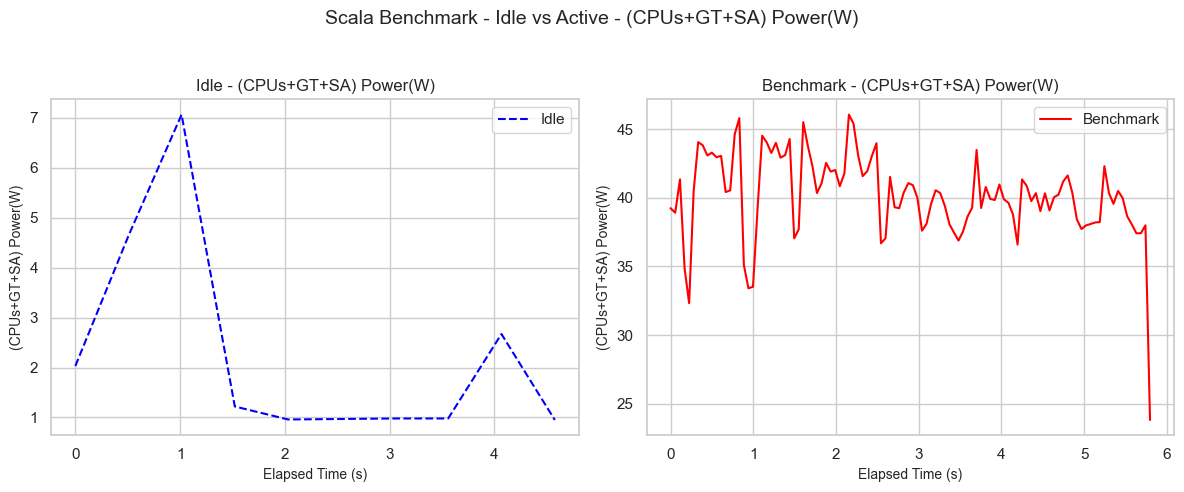

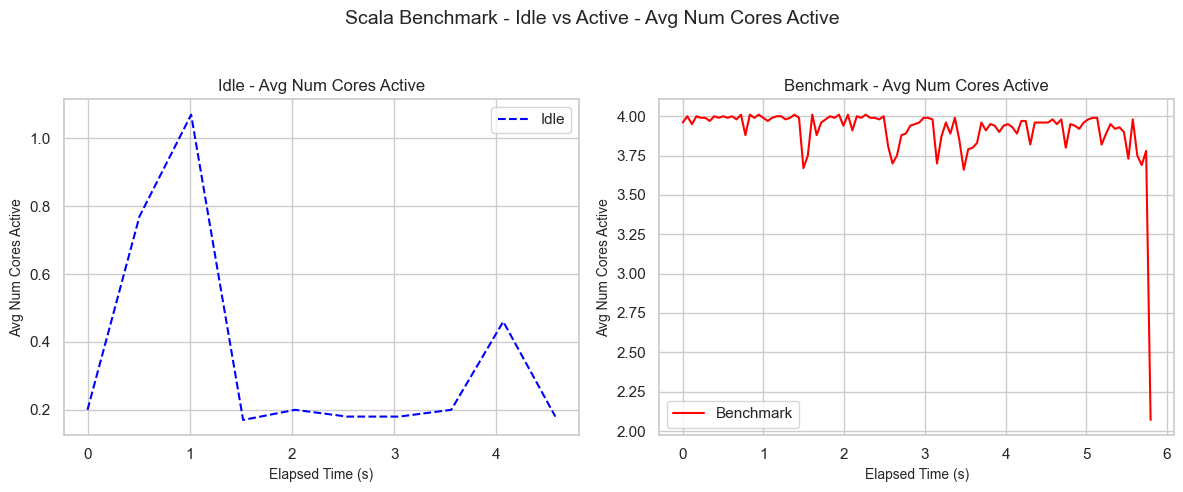

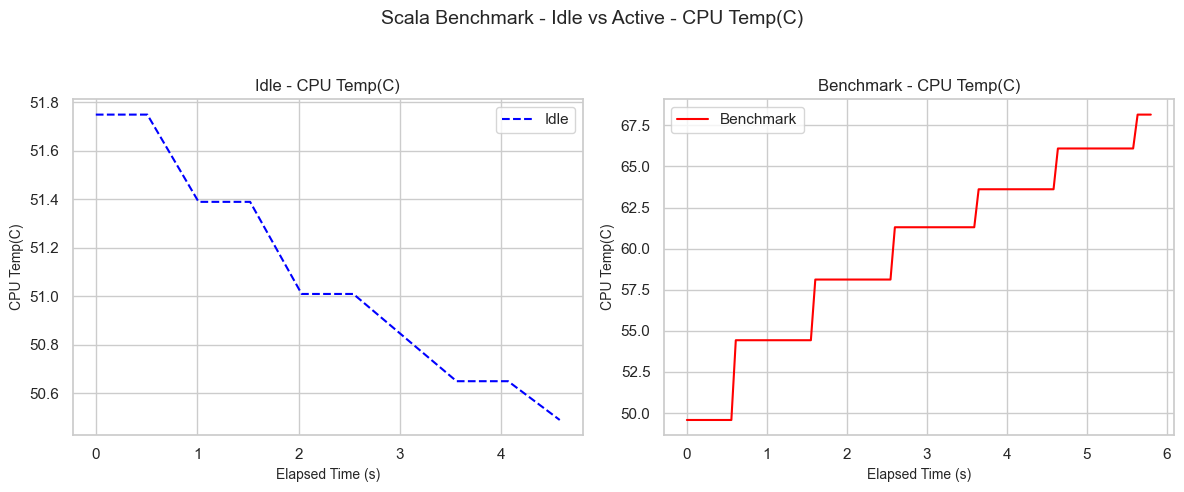

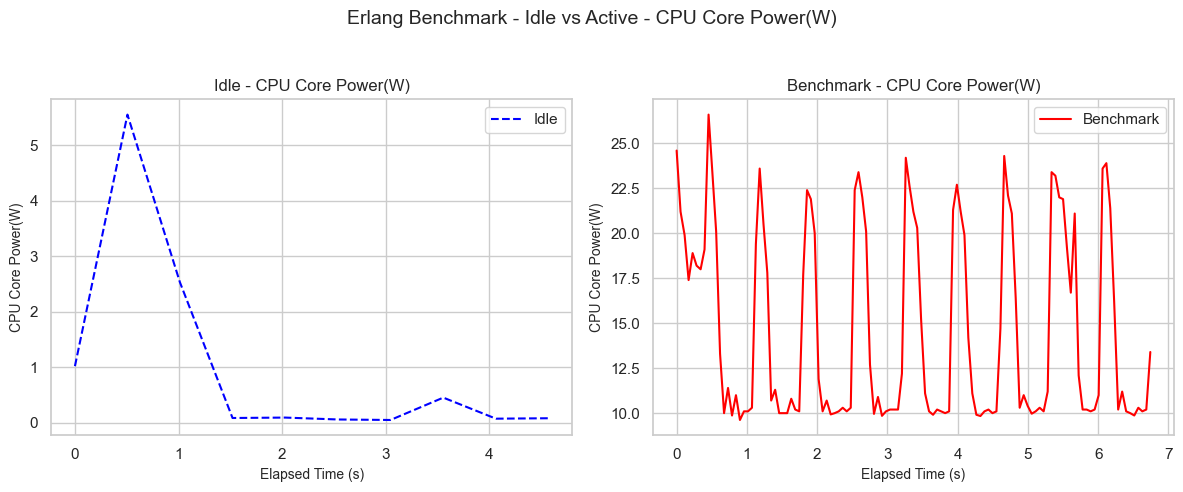

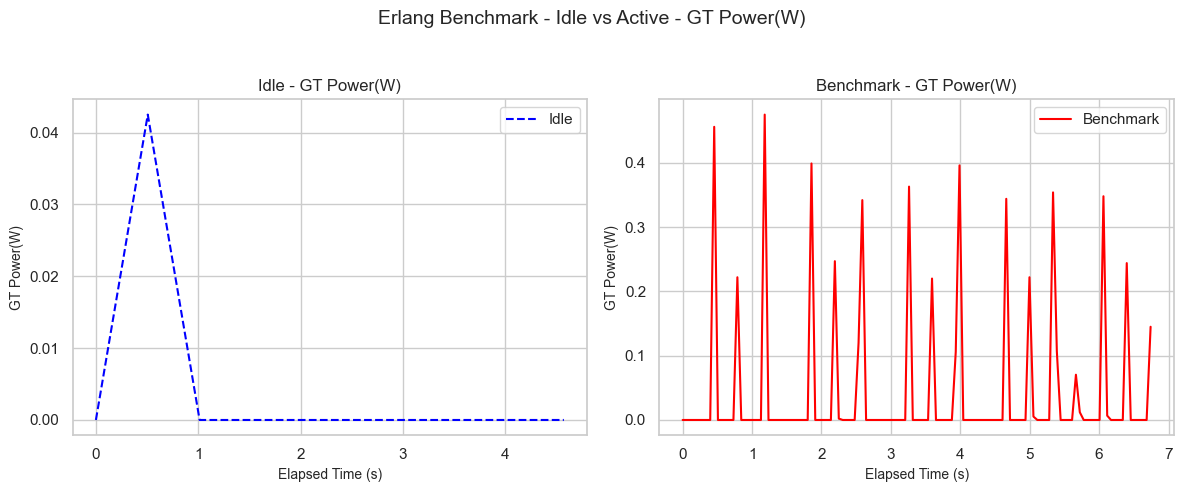

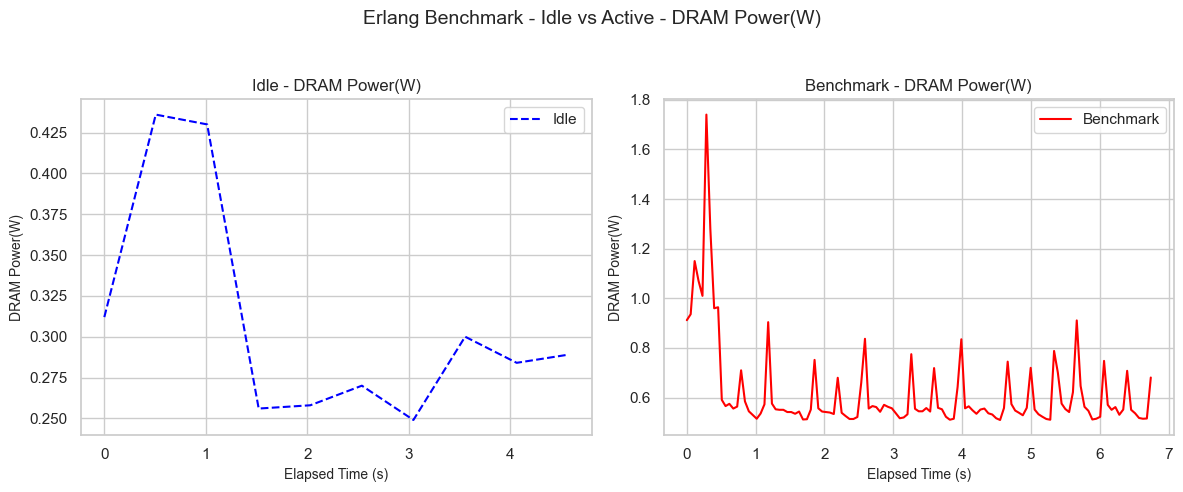

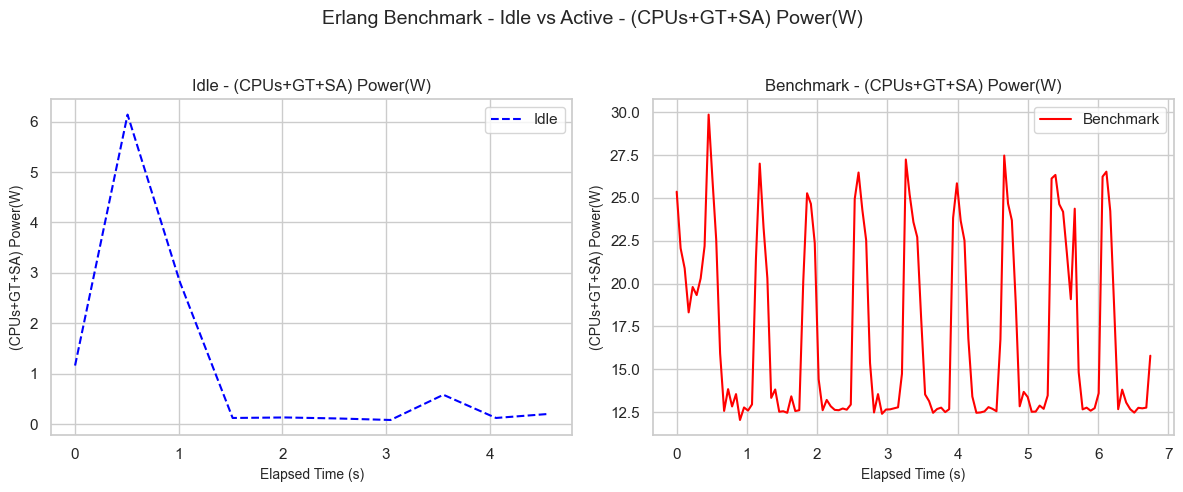

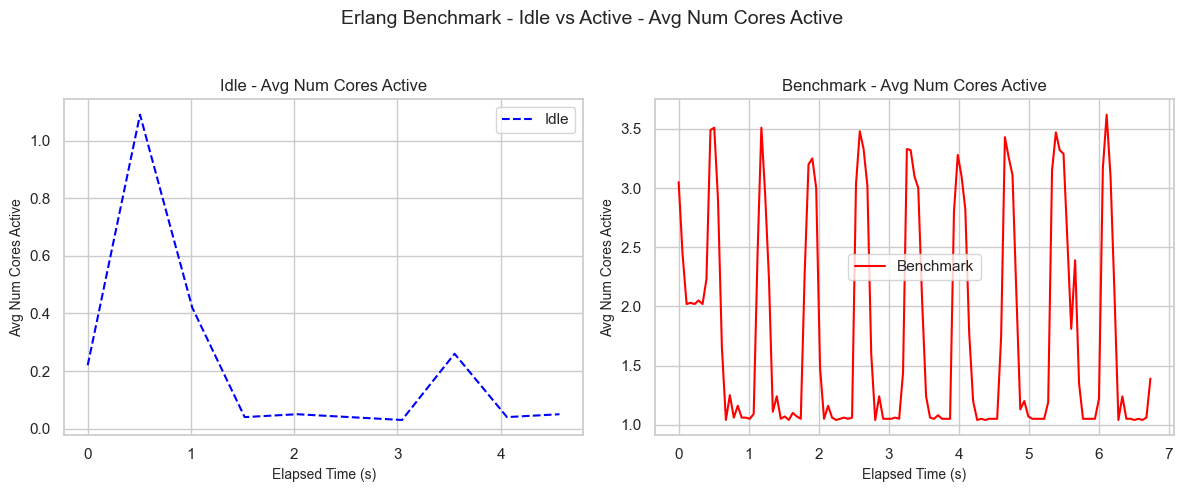

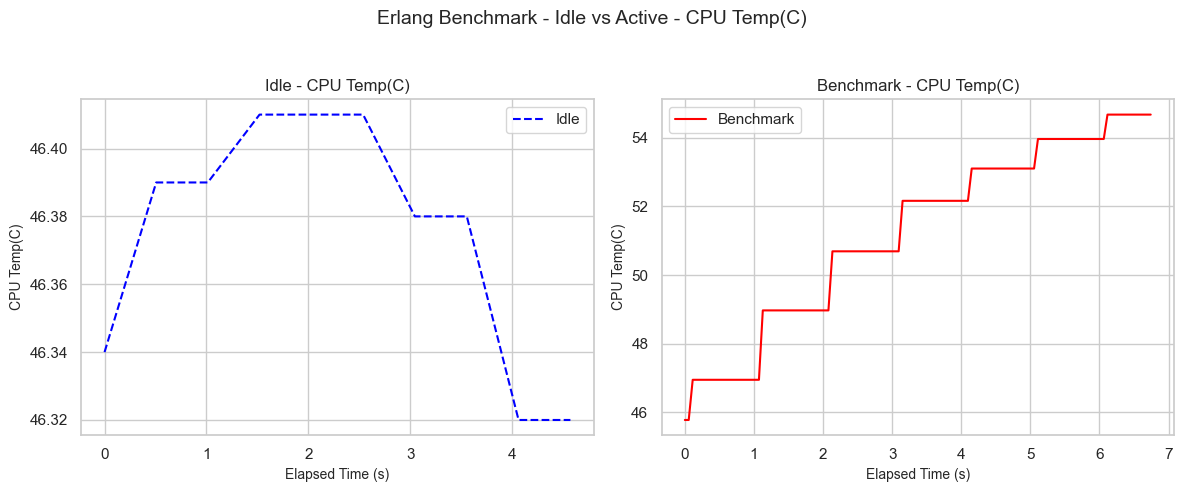

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

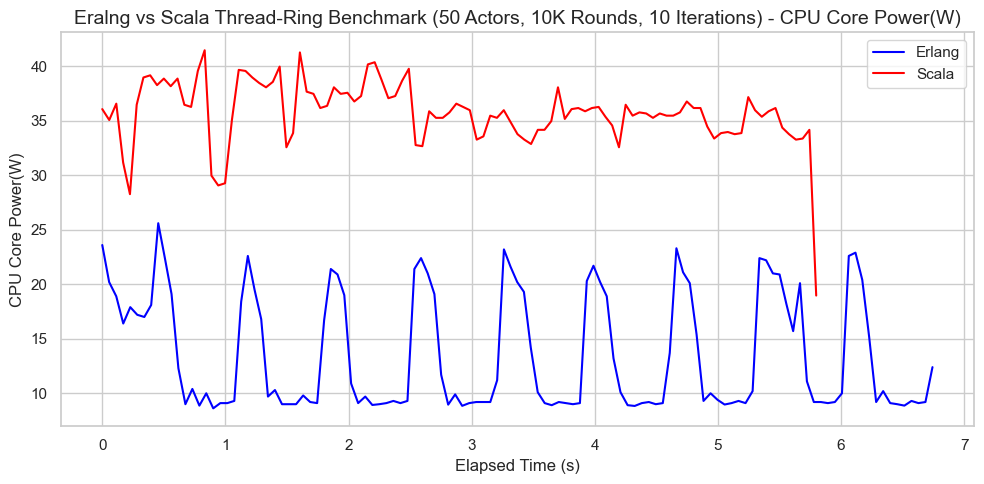

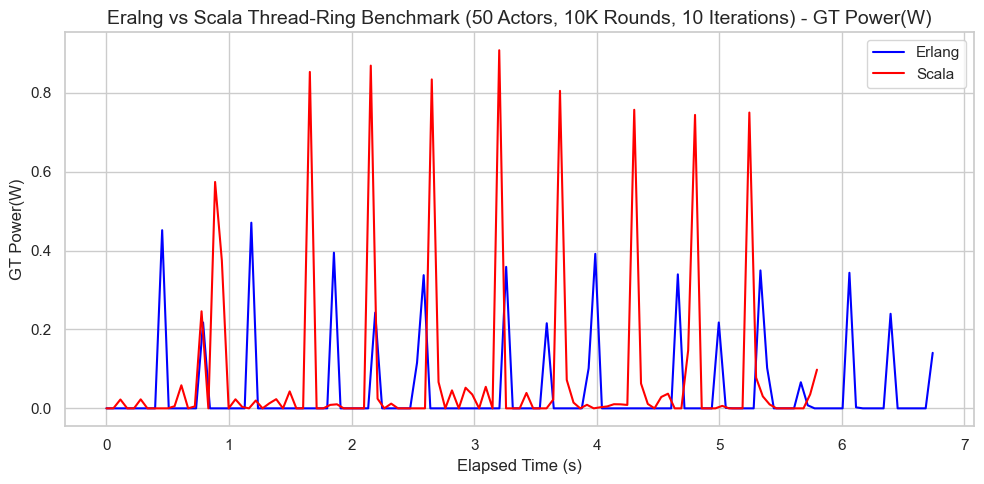

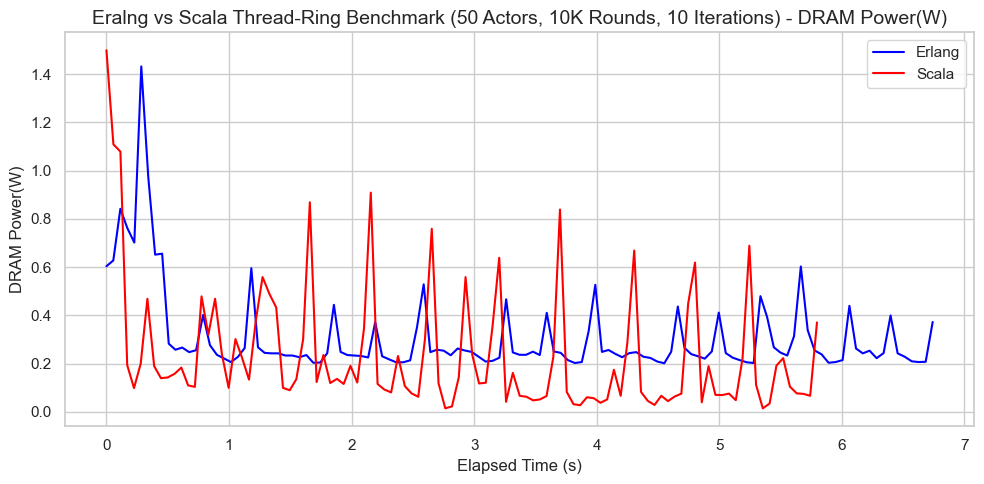

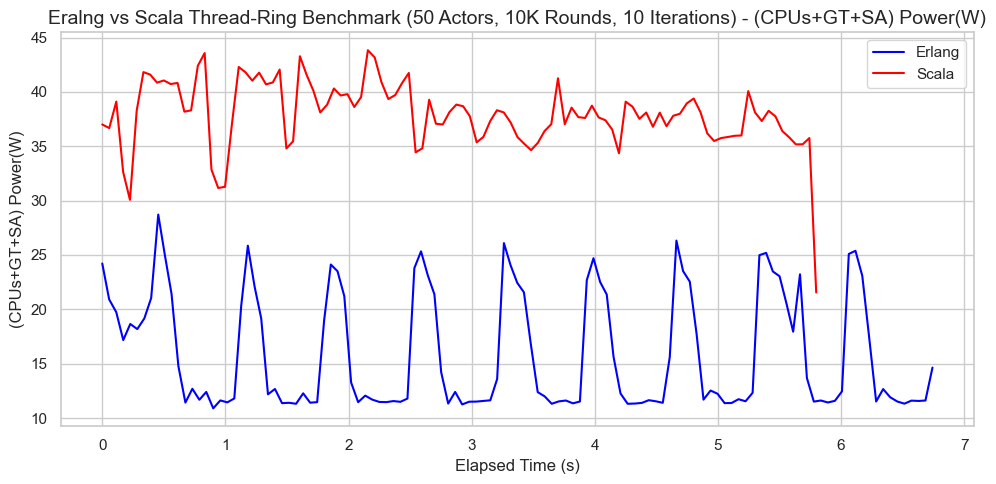

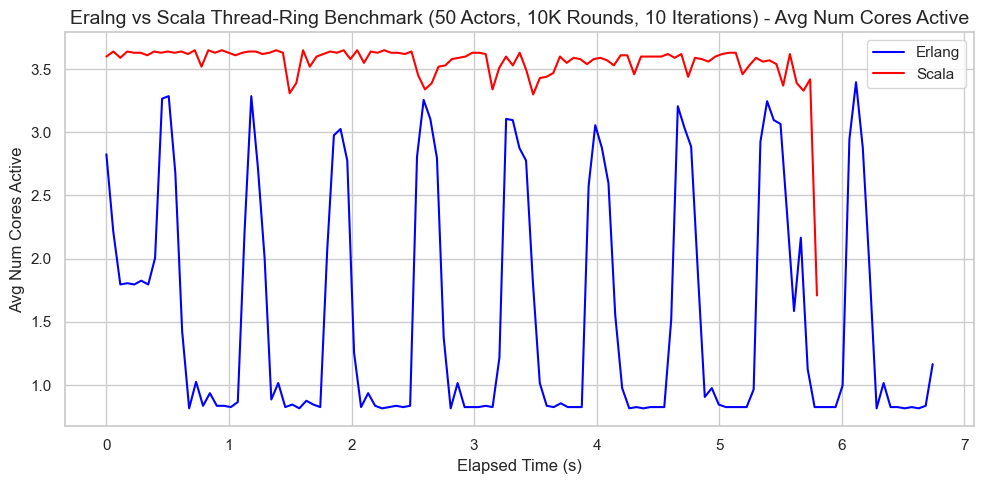

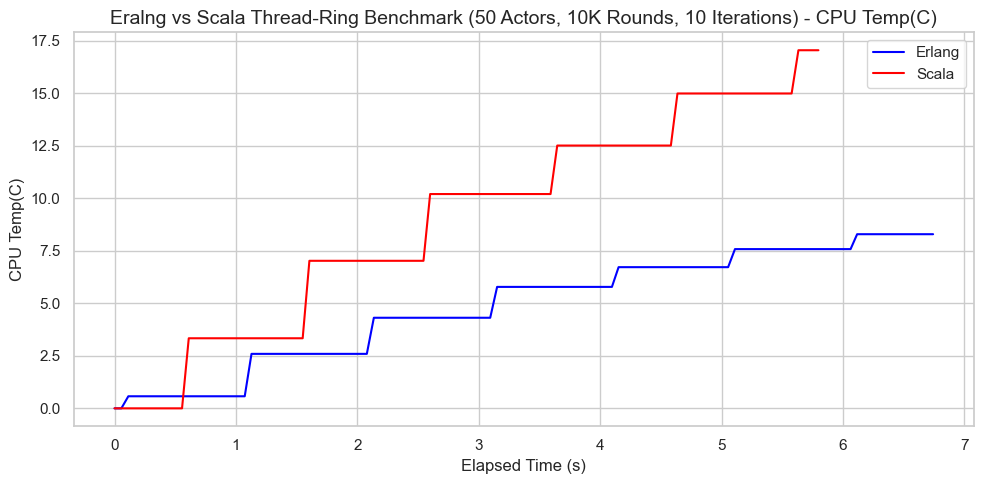

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        35.725834
GT Power(W)               0.078409
DRAM Power(W)             0.235879
(CPUs+GT+SA) Power(W)    37.915604
CPU Temp(C)               8.749321
Avg Num Cores Active      3.551358
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.598885
GT Power(W)               0.038780
DRAM Power(W)             0.309501
(CPUs+GT+SA) Power(W)    15.972190
CPU Temp(C)               4.860041
Avg Num Cores Active      1.577983
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 222.09633644433964 Joules
Erlang Benchmark: 108.59252454338844 Joules
